In [1]:
from sklearn.cluster import MeanShift
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

In [2]:
X, y = make_blobs(n_samples=200, centers=3, random_state=0)

In [3]:
X.shape, y.shape

((200, 2), (200,))

In [4]:
mean_shift = MeanShift()
mean_shift.fit(X)

MeanShift()

In [5]:
#or you can do: labels = mean_shift.labels_
labels = mean_shift.predict(X)

In [6]:
cluster_centers = mean_shift.cluster_centers_

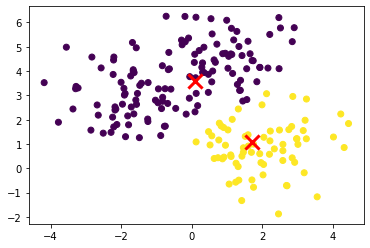

In [7]:
plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker="x", s=200, linewidths=3, color="r")
plt.show()

# The mean shift algorithm returns the cluster label for each data point in the dataset. By plotting the data points and coloring them based on their cluster label, we can visualize the clusters and gain insights into the structure of the data.

Evaluating the Model

In [8]:
from sklearn.metrics import silhouette_score

In [9]:
silhouette_score = silhouette_score(X, mean_shift.labels_)
print("Silhouette Score:", silhouette_score)

Silhouette Score: 0.4492124365972066


A higher silhouette score indicates that the clusters are well-defined and that the points within each cluster are similar to each other.

# Tuning the Mean Shift Parameters

To improve the performance of the mean shift model, it may be necessary to tune the bandwidth parameter. This can be done by using grid search and cross-validation to find the optimal bandwidth for the data set.

source : https://scikit-learn.org/stable/modules/generated/sklearn.cluster.estimate_bandwidth.html

In [30]:
from sklearn.cluster import estimate_bandwidth

In [31]:
#create an instance
mean_shift = MeanShift()

quantilefloat, default=0.3
Should be between [0, 1] 0.5 means that the median of all pairwise distances is used.

n_samples int, default=None
The number of samples to use. If not given, all samples are used.

In [32]:
# The following bandwidth can be automatically detected using
bandwidth = estimate_bandwidth(X)

In [33]:
bandwidth

2.271621419887312

In [34]:
ms = MeanShift(bandwidth=2.271621419887312)
ms.fit(X)

MeanShift(bandwidth=2.271621419887312)

In [35]:
#or you can do: labels = mean_shift.labels_
labels = ms.predict(X)

In [36]:
cluster_centers = ms.cluster_centers_

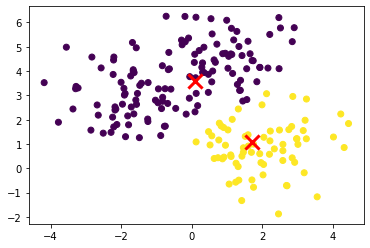

In [37]:
plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker="x", s=200, linewidths=3, color="r")
plt.show()

In [46]:
from sklearn.metrics import silhouette_score

In [47]:
silhouette_score = silhouette_score(X, ms.predict(X))
print("Silhouette Score:", silhouette_score)

Silhouette Score: 0.4492124365972066


# The bandwidth is almost the same 2 vs 2.271621419887312, that's why the  silhouette_score gives the same value. 

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import MeanShift

In [50]:
X, y = make_blobs(n_samples=10000, centers=4, random_state=42)

In [51]:
X.shape, y.shape

((10000, 2), (10000,))

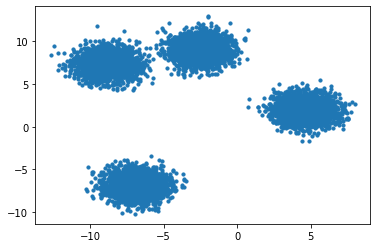

In [52]:
plt.scatter(X[:,0], X[:,1], s=10)
plt.show()

In [67]:
bandwidth = estimate_bandwidth(X)

In [68]:
bandwidth 

8.522374991799193

In [69]:
ms = MeanShift(bandwidth=8.522374991799193)
ms.fit(X)

MeanShift(bandwidth=8.522374991799193)

In [70]:
labels = ms.labels_
centers = ms.cluster_centers_

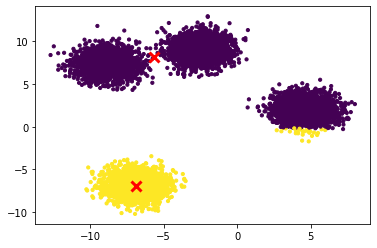

In [71]:
plt.scatter(X[:,0], X[:,1], c=labels, s=10)
plt.scatter(centers[:,0], centers[:,1], marker='x', s=100, linewidths=3, color='r')
plt.show()

# A larger bandwidth will result in larger windows, which can lead to fewer and larger clusters, while a smaller bandwidth will result in smaller windows, which can lead to more and smaller clusters.

In [72]:
ms = MeanShift(bandwidth=2)
ms.fit(X)

MeanShift(bandwidth=2)

In [73]:
labels = ms.labels_
centers = ms.cluster_centers_

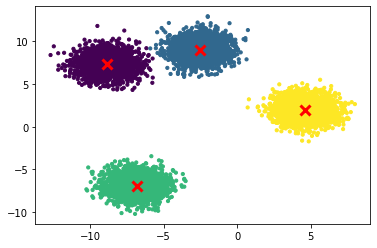

In [74]:
plt.scatter(X[:,0], X[:,1], c=labels, s=10)
plt.scatter(centers[:,0], centers[:,1], marker='x', s=100, linewidths=3, color='r')
plt.show()

In [75]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
data = pd.read_csv('C:/Users/Admin/Machine Learning chapter 5/Unsupervised learning/Spending_Score.csv')

In [76]:
data.head(5)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [77]:
# extracting the above mentioned columns
x = data.loc[:, ['Age','Annual Income (k$)',
                 'Spending Score (1-100)']].values

In [101]:
ms = MeanShift(bandwidth= 25)
ms.fit(x)

MeanShift(bandwidth=25)

In [102]:
labels = ms.labels_
centers = ms.cluster_centers_

In [103]:
data['clusters'] = labels

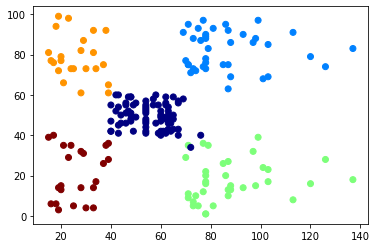

In [104]:
plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'], c=data['clusters'], marker='o',cmap='jet')